In [1]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [2]:
TRAINING_DIR = "./maskdata/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(224, 224))
VALIDATION_DIR = "./maskdata/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(224, 224))

Found 616 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


In [4]:
# Loading VGG16 base model from Keras
import tensorflow as tf
baseModel = tf.keras.applications.VGG16(weights="imagenet", 
                                        include_top=False, 
                                        input_tensor=tf.keras.layers.Input(shape=(224, 224, 3)))
baseModel.trainable = False

In [7]:
# Add more layers to the base model

model = Sequential()

model.add(baseModel)


model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(2, activation="softmax"))

In [8]:
# Compile the model

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 16,320,514
Trainable params: 1,605,826
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [10]:
history = model.fit(train_generator,
                              steps_per_epoch = 12,
                              epochs=20,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 1.7965 - accuracy: 0.5833WARNING:tensorflow:From C:\Users\HP\Miniconda2\envs\python3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model2-001.model\assets
12/12 [==============================] - 76s 6s/step - loss: 1.7965 - accuracy: 0.5833 - val_loss: 0.4891 - val_accuracy: 0.7677
Epoch 2/20
12/12 [==============================] - 66s 6s/step - loss: 0.7843 - accuracy: 0.7500 - val_loss: 0.4241 - val_accuracy: 0.7879
Epoch 3/20
12/12 [==============================] - 66s 5s/step - loss: 0.4004 - accuracy: 0

In [11]:
# Training results

train_acc = history.history["accuracy"]
train_loss = history.history["loss"]

validation_acc = history.history["val_accuracy"]
validation_loss = history.history["val_loss"]

epochs = range(len(train_acc))

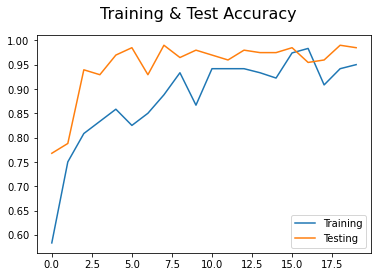

In [13]:
# Plot the train and test accuracy
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(epochs, train_acc, label='Training')
ax.plot(epochs, validation_acc, label='Testing')
leg = ax.legend();
fig.suptitle('Training & Test Accuracy', fontsize=16);

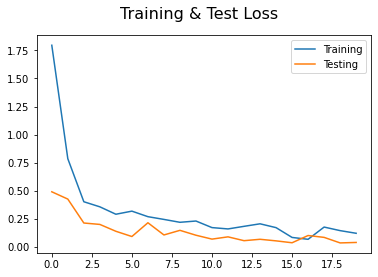

In [14]:
# Plot the train and test loss

fig, ax = plt.subplots()
ax.plot(epochs, train_loss, label='Training')
ax.plot(epochs, validation_loss, label='Testing')
leg = ax.legend();
fig.suptitle('Training & Test Loss', fontsize=16);